In [1]:
from pandas_datareader.data import Options
import pandas as pd
import numpy as np
import scipy.stats as si
from datetime import date
from datetime import datetime
import math
import matplotlib.pyplot as plt
import timeit

In [31]:
# Density for conditional loss distribution
def CLD(N, n, dp, beta, Z):
    # N: number of credits, n: the nth credit, dp: default prob
    
    CT = si.norm.ppf(dp)
    
    # the first factorial term
    FT = math.factorial(N) / (math.factorial(N - n) * math.factorial(n))
    
    pTZ = si.norm.cdf((CT - beta * Z) / np.sqrt(1 - beta **2), 0.0, 1.0)
    result = FT *  (pTZ ** n) * (1 -  pTZ) ** (N - n)
    
    return result

In [107]:
# Build empty dataframe for the distribution
index = range(100)
columns = [-5.0, -3.0, -1.0, -0.5, 0.0, 0.5, 1.0, 3.0, 5.0] # Z
df = pd.DataFrame(index=index, columns=columns)
df = df.fillna(0.0)

In [110]:
# Fill the dataframe with density
for j in columns:
    for i in index:
        df.at[i,j] = CLD(100, i, 0.06, 0.3, j)

In [112]:
df

,-5.0,-3.0,-1.0,-0.5,0.0,0.5,1.0,3.0,5.0
0,6.940127e-29,5.292529e-13,5.052401e-05,6.733689e-04,5.019524e-03,2.313982e-02,7.229631e-02,6.035423e-01,9.340763e-01
1,6.332403e-27,1.728918e-11,5.253976e-04,5.101789e-03,2.729156e-02,8.881112e-02,1.924377e-01,3.055228e-01,6.372306e-02
2,2.860059e-25,2.795701e-10,2.704479e-03,1.913362e-02,7.345128e-02,1.687251e-01,2.535534e-01,7.655698e-02,2.151870e-03
3,8.524737e-24,2.983366e-09,9.187108e-03,4.735561e-02,1.304578e-01,2.115397e-01,2.204694e-01,1.265976e-02,4.795515e-05
4,1.886227e-22,2.363358e-08,2.316759e-02,8.700670e-02,1.720076e-01,1.968842e-01,1.423095e-01,1.554079e-03,7.933435e-07
5,3.304428e-21,1.482319e-07,4.625647e-02,1.265678e-01,1.795621e-01,1.450839e-01,7.272928e-02,1.510464e-04,1.039146e-08
6,4.773862e-20,7.666997e-07,7.616144e-02,1.518327e-01,1.545798e-01,8.816556e-02,3.065178e-02,1.210650e-05,1.122441e-10
7,5.849259e-19,3.363305e-06,1.063544e-01,1.544772e-01,1.128622e-01,4.543976e-02,1.095619e-02,8.229707e-07,1.028271e-12
8,6.204332e-18,1.277233e-05,1.285697e-01,1.360589e-01,7.133574e-02,2.027385e-02,3.390210e-03,4.842986e-08,8.154827e-15
9,5.786841e-17,4.265075e-05,1.366703e-01,1.053760e-01,3.964773e-02,7.954060e-03,9.224566e-04,2.506077e-09,5.686884e-17


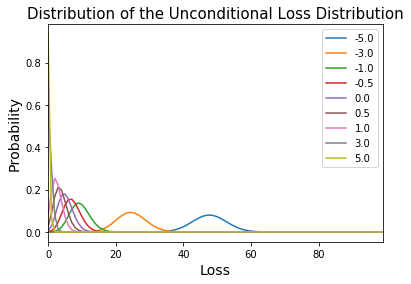

In [123]:
df.plot()
plt.title('Distribution of the Unconditional Loss Distribution',fontsize=15)
plt.ylabel('Probability', fontsize=14)
plt.xlabel('Loss', fontsize=14)
plt.show()

In [25]:
# Gaussian copula generating default numbers
def GC(p, N, cor, hr):
    dnumber = [None] * p # default number list
    
    for i in range(p):
        Z = np.random.normal(0, 1, 1)
        eps = np.random.normal(0, 1, N)
        A = cor * Z + np.sqrt(1 - cor ** 2) * eps
        u = si.norm.cdf(A)
        tau = -1 / hr * np.log(1 - u)
        dnumber[i] = sum(num < 1 for num in tau)  
    
    return dnumber

In [48]:
df2 = GC(10 ** 4, 100, 0.50, 0.2)

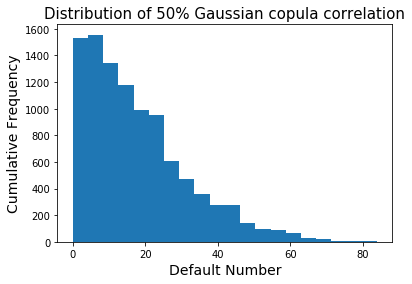

In [50]:
# Plot the distribution
plt.hist(df2, bins = 20)
plt.title('Distribution of 50% Gaussian copula correlation',fontsize=15)
plt.ylabel('Cumulative Frequency', fontsize=14)
plt.xlabel('Default Number', fontsize=14)
plt.show()